This code file calculates the Bhattacharyya distance between two multivariate Gaussian distributions, a measure of the overlap and similarity between these distributions. The script provides both a mathematical implementation of the Bhattacharyya distance formula and a visualization of the two distributions and their respective contours, illustrating how the Bhattacharyya distance quantifies their separation.


In [1]:
import numpy as np
def bhattacharyya_distance(mean1, cov1, mean2, cov2):
    mean1 = np.asarray(mean1)
    cov1 = np.asarray(cov1)
    mean2 = np.asarray(mean2)
    cov2 = np.asarray(cov2)

    cov_mean = (cov1 + cov2) / 2
    mean_diff = mean1 - mean2
    term1 = 0.125 * np.dot(np.dot(mean_diff.T, np.linalg.inv(cov_mean)), mean_diff)
    term2 = 0.5 * np.log(np.linalg.det(cov_mean) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))

    return term1 + term2

In [2]:
from scipy.optimize import differential_evolution
# DIFF EVOLUTION:
# First four elements (params[0:4]): Mean vectors for the two distributions.
# Next three elements (params[4:7]): Covariance matrix elements for the first distribution.
# Last three elements (params[7:10]): Covariance matrix elements for the second distribution.

# objective function for optimization
# def objective(params):
#     mean1 = params[0:2]
#     mean2 = params[2:4]
#     cov1 = np.array([[params[4], params[5]], [params[5], params[6]]])
#     cov2 = np.array([[params[7], params[8]], [params[8], params[9]]])

#     return bhattacharyya_distance(mean1, cov1, mean2, cov2)

# # Bounds for the parameters (mean and covariance elements)
# bounds = [(-5, 5), (-5, 5), (-5, 5), (-5, 5),  # means
#           (0, 3), (-3, 3), (0, 3),  # cov1 elements
#           (0, 3), (-3, 3), (0, 3)]  # cov2 elements

# # Perform Differential Evolution optimization
# result = differential_evolution(objective, bounds)

# # Print the result
# print(f'Minimum Bhattacharyya Distance: {result.fun}')
# print('Optimal Parameters:')
# print(f'Mean1: {result.x[0:2]}')
# print(f'Mean2: {result.x[2:4]}')
# print(f'Cov1: [[{result.x[4]}, {result.x[5]}], [{result.x[5]}, {result.x[6]}]]')
# print(f'Cov2: [[{result.x[7]}, {result.x[8]}], [{result.x[8]}, {result.x[9]}]]')


Bhattacharyya distance: 0.31774574732673216


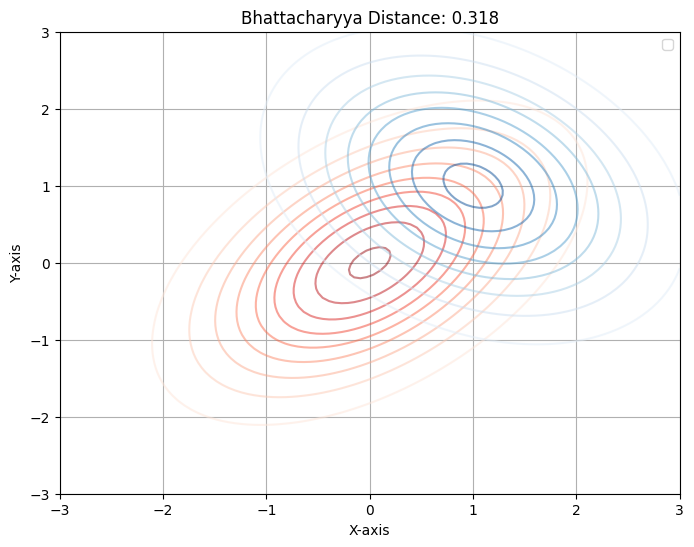

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# Example visualization of BIVARIATE gaussians with their B distance
# Create multivariate normal distributions

# Parameters for the two Gaussian distributions
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
mean2 = [1, 1]
cov2 = [[1, -0.3], [-0.3, 1]]

# Generate grid points
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)

# Compute the Bhattacharyya distance
distance = bhattacharyya_distance(mean1, cov1, mean2, cov2)
print(f'Bhattacharyya distance: {distance}')

# Plotting the contours
plt.figure(figsize=(8, 6))
plt.contour(x, y, rv1.pdf(pos), levels=10, cmap='Reds', alpha=0.5)  # Contours for the first distribution
plt.contour(x, y, rv2.pdf(pos), levels=10, cmap='Blues', alpha=0.5)  # Contours for the second distribution
plt.title(f'Bhattacharyya Distance: {distance:.3f}')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Distribution 1', 'Distribution 2'])
plt.grid(True)
plt.show()
